## CardioVascular Disease Prediction

# About Dataset:
## Features included in dataset :
1. `General Health`: Would you say that in general your health is.
2. `Checkup`       : About how long has it been since you last visited a doctor for a routine checkup?
3. `Exercise`      : During the past month, other than your regular job, did you participate in any physical activities or exercises such running,         
                     calisthenics, golf, gardening, or walking for exercise?
4. `Heart_Disease` : Respondents that reported having coronary heart disease or mycardialinfarction
5. `Skin_Cancer`   : Respondents that reported having skin cancer
6. `Other_Cancer`  : Respondents that reported having any other types of cancer
7. `Depression`    : Respondents that reported having a depressive disorder (including depression, major depression, dysthymia, or minor depression)
8. `Diabetes`      : Respondents that reported having a diabetes. If yes, what type of diabetes it is/was.
9. `Arthritis`     : Respondents that reported having an Arthritis
10. `Sex`          : Respondent's Gender
11. `Age_Category` : Respondent's age belonging to a certain category.
12. `Height_(cm)`  : Respondent's height in cm.
13. `Weight_(kg)`  : Respondent's weight in kg.
14. `BMI`          : Body Mass Index
15. `Smoking_History` : Respondent is either a smoker or not.
16. `Alcohol_Consumption` : Respondent is either alcoholic or not.
17. `Fruit_Consumption`
18. `Green_Vegetables_Consumption` 
19. `Fried_Potato_Consumption`


##Link to dataset: https://www.kaggle.com/datasets/alphiree/cardiovascular-diseases-risk-prediction-dataset

In [1]:
# Import necessary libraries
%pip install pandas
%pip install numpy
%pip install seaborn
%pip install matplotlib
%pip install scikit-learn
%pip install warnings
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

     |████████████████████████████████| 12.4 MB 18.7 MB/s eta 0:00:01
     |████████████████████████████████| 17.3 MB 33.2 MB/s eta 0:00:01
     |████████████████████████████████| 502 kB 65.9 MB/s eta 0:00:01
     |████████████████████████████████| 341 kB 63.8 MB/s eta 0:00:01
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
     |████████████████████████████████| 293 kB 25.1 MB/s eta 0:00:01
     |████████████████████████████████| 9.2 MB 61.1 MB/s eta 0:00:01
     |████████████████████████████████| 98 kB 12.7 MB/s eta 0:00:01
     |████████████████████████████████| 300 kB 59.4 MB/s eta 0:00:01
     |████████████████████████████████| 4.6 MB 55.8 MB/s eta 0:00:01
     |████████████████████████████████| 1.2 MB 55.5 MB/s eta 0:00:01
     |████████████████████████████████| 3.3 MB 59.7 MB/s eta 

In [2]:
# Read dataset as dataframe
df = pd.read_csv('/config/workspace/CardioVascular_Disease_Prediction/notebooks/data/CVD_cleaned.csv')
df.head()

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,Poor,Within the past 2 years,No,No,No,No,No,No,Yes,Female,70-74,150,32.66,14.54,Yes,0,30,16,12
1,Very Good,Within the past year,No,Yes,No,No,No,Yes,No,Female,70-74,165,77.11,28.29,No,0,30,0,4
2,Very Good,Within the past year,Yes,No,No,No,No,Yes,No,Female,60-64,163,88.45,33.47,No,4,12,3,16
3,Poor,Within the past year,Yes,Yes,No,No,No,Yes,No,Male,75-79,180,93.44,28.73,No,0,30,30,8
4,Good,Within the past year,No,No,No,No,No,No,No,Male,80+,191,88.45,24.37,Yes,0,8,4,0


In [3]:
# Let's check shape of dataset
print("No. of rows   : "  ,df.shape[0],"\nNo. of columns: ",df.shape[1])

No. of rows   :  308854 
No. of columns:  19


In [4]:
# Let's check feature names
df.columns

Index(['General_Health', 'Checkup', 'Exercise', 'Heart_Disease', 'Skin_Cancer',
       'Other_Cancer', 'Depression', 'Diabetes', 'Arthritis', 'Sex',
       'Age_Category', 'Height_(cm)', 'Weight_(kg)', 'BMI', 'Smoking_History',
       'Alcohol_Consumption', 'Fruit_Consumption',
       'Green_Vegetables_Consumption', 'FriedPotato_Consumption'],
      dtype='object')

In [5]:
# Let's check info about features
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308854 entries, 0 to 308853
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   General_Health                308854 non-null  object 
 1   Checkup                       308854 non-null  object 
 2   Exercise                      308854 non-null  object 
 3   Heart_Disease                 308854 non-null  object 
 4   Skin_Cancer                   308854 non-null  object 
 5   Other_Cancer                  308854 non-null  object 
 6   Depression                    308854 non-null  object 
 7   Diabetes                      308854 non-null  object 
 8   Arthritis                     308854 non-null  object 
 9   Sex                           308854 non-null  object 
 10  Age_Category                  308854 non-null  object 
 11  Height_(cm)                   308854 non-null  int64  
 12  Weight_(kg)                   308854 non-nul

In [6]:
# Let's count missing/NaN values in dataset
df.isna().sum()

General_Health                  0
Checkup                         0
Exercise                        0
Heart_Disease                   0
Skin_Cancer                     0
Other_Cancer                    0
Depression                      0
Diabetes                        0
Arthritis                       0
Sex                             0
Age_Category                    0
Height_(cm)                     0
Weight_(kg)                     0
BMI                             0
Smoking_History                 0
Alcohol_Consumption             0
Fruit_Consumption               0
Green_Vegetables_Consumption    0
FriedPotato_Consumption         0
dtype: int64

## No missing values found in dataset

In [7]:
df.shape

(308854, 19)

In [8]:
# Let's check for any duplicate entry
df.duplicated().sum()

80

## 80 duplicate entries found in dataset

In [9]:
# Let's drop duplicates from dataset
df_copy = df
df = df.drop_duplicates()
df.shape

(308774, 19)

In [10]:
df.duplicated().sum()

0

## Dataset is free of duplicate entries

In [11]:
# Let's check for description of numerical features
df.describe()

,Height_(cm),Weight_(kg),BMI,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
count,308774.000000,308774.000000,308774.000000,308774.000000,308774.000000,308774.000000,308774.000000
mean,170.615220,83.590399,28.626813,5.097557,29.834290,15.109517,6.297237
std,10.658452,21.344664,6.522810,8.200434,24.877812,14.926912,8.583837
min,91.000000,24.950000,12.020000,0.000000,0.000000,0.000000,0.000000
25%,163.000000,68.040000,24.210000,0.000000,12.000000,4.000000,2.000000
50%,170.000000,81.650000,27.440000,1.000000,30.000000,12.000000,4.000000
75%,178.000000,95.250000,31.850000,6.000000,30.000000,20.000000,8.000000
max,241.000000,293.020000,99.330000,30.000000,120.000000,128.000000,128.000000


In [21]:
# Segregate numerical and categorical features
numerical_features   = [col for col in df.columns if df[col].dtype!='O']
categorical_features = [col for col in df.columns if df[col].dtype=='O']

In [26]:
print("Numerical Features--> ",numerical_features,"\nCount = ",len(numerical_features))

Numerical Features-->  ['Height_(cm)', 'Weight_(kg)', 'BMI', 'Alcohol_Consumption', 'Fruit_Consumption', 'Green_Vegetables_Consumption', 'FriedPotato_Consumption'] 
Count =  7


In [28]:
print("Categorical Features--> ",categorical_features,"\nCount = ",len(categorical_features))

Categorical Features-->  ['General_Health', 'Checkup', 'Exercise', 'Heart_Disease', 'Skin_Cancer', 'Other_Cancer', 'Depression', 'Diabetes', 'Arthritis', 'Sex', 'Age_Category', 'Smoking_History'] 
Count =  12


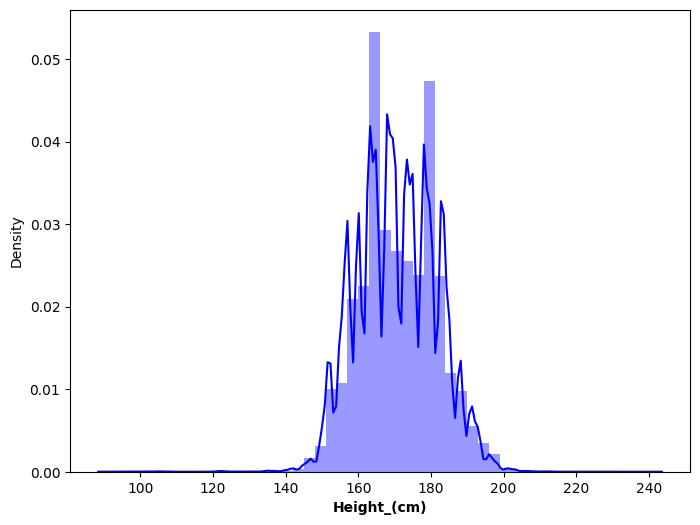

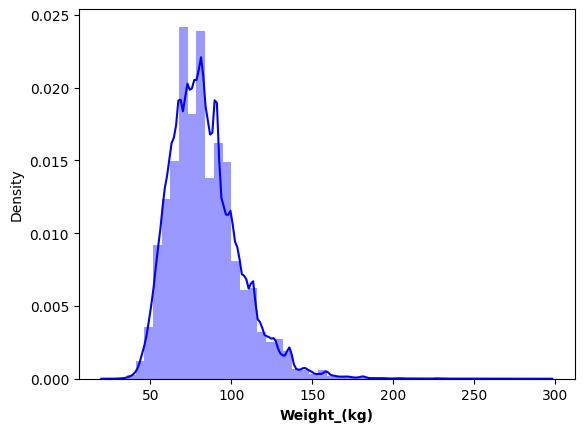

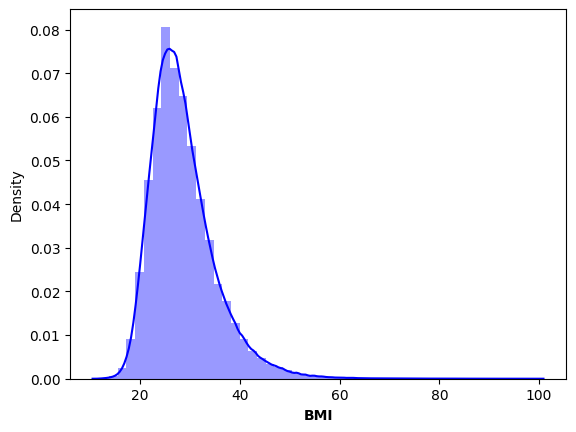

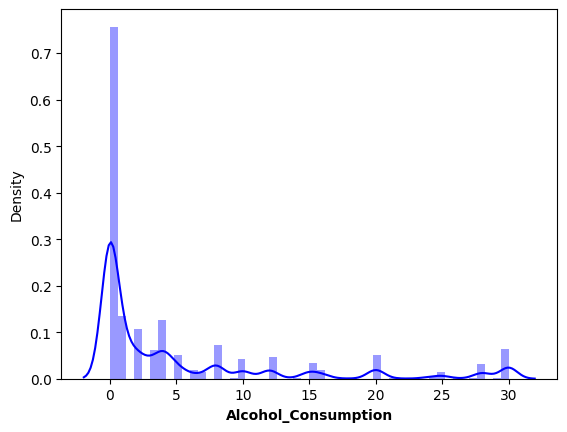

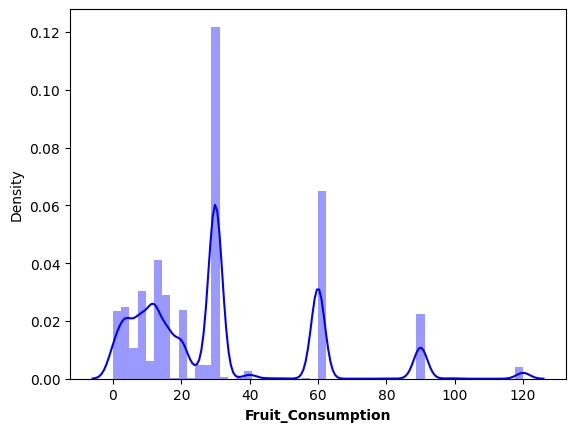

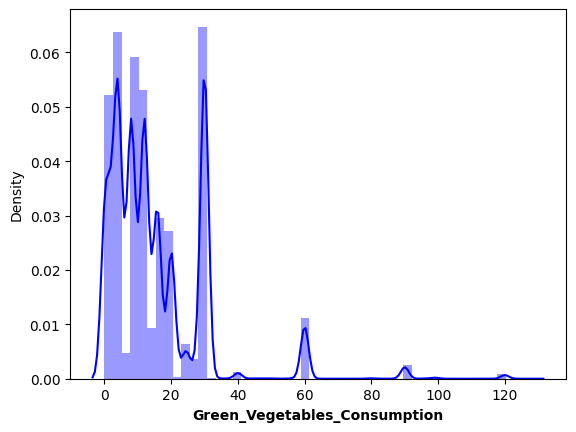

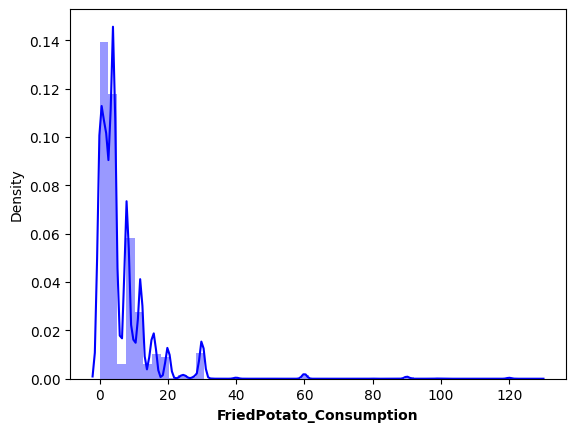

In [35]:
# Let's visualize numerical features
plt.figure(figsize=(8,6))
for col in numerical_features:
    sns.distplot(x=df[col],color="blue")
    plt.xlabel(col,weight="bold")
    print("\n")
    # plt.tight_layout()
    plt.show()


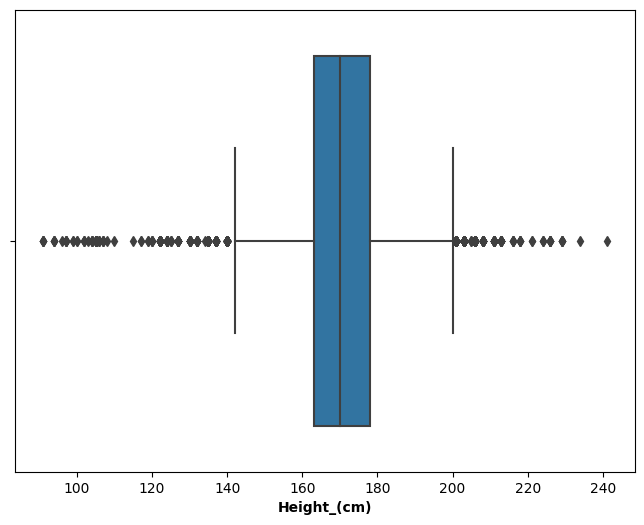

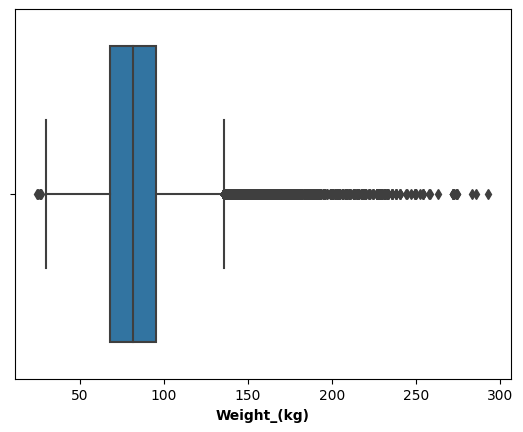

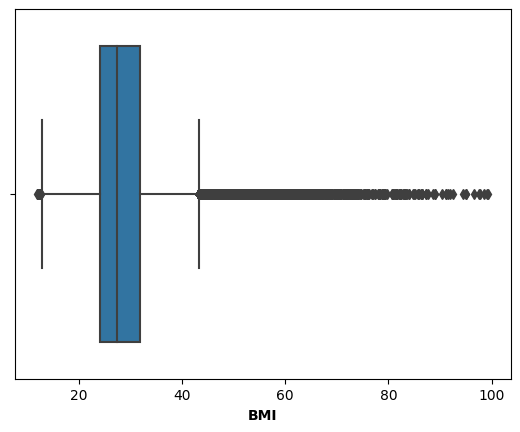

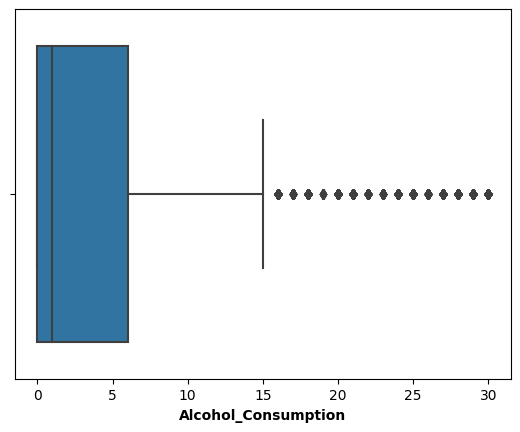

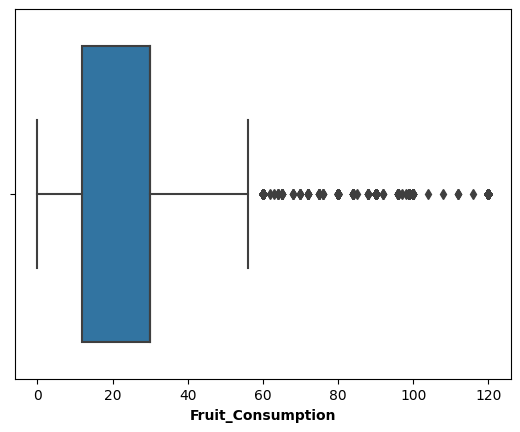

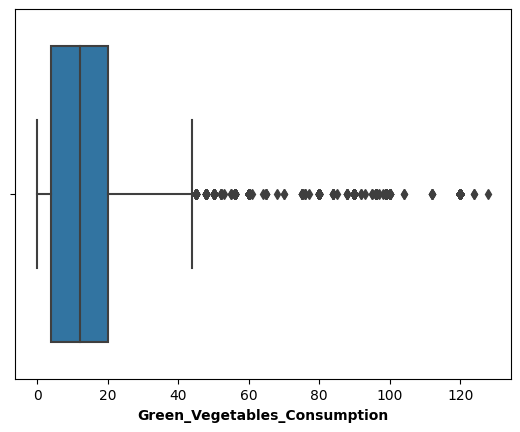

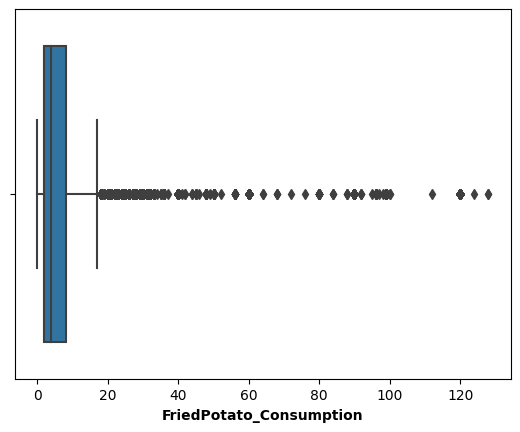

In [36]:
# Let's check for outliers
plt.figure(figsize=(8,6))
for col in numerical_features:
    sns.boxplot(data=df,x=col)
    print("\n")
    plt.xlabel(col,weight="bold")
    plt.show()

<Figure size 800x600 with 0 Axes>

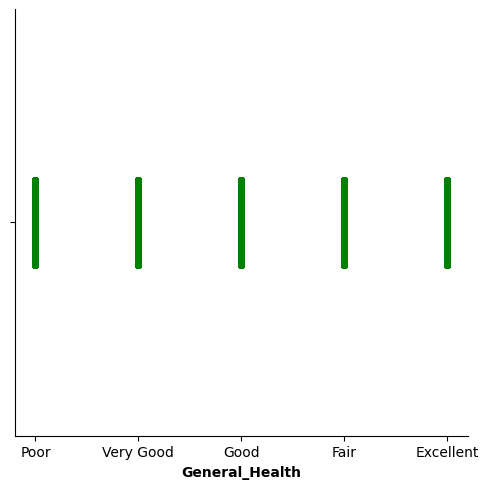

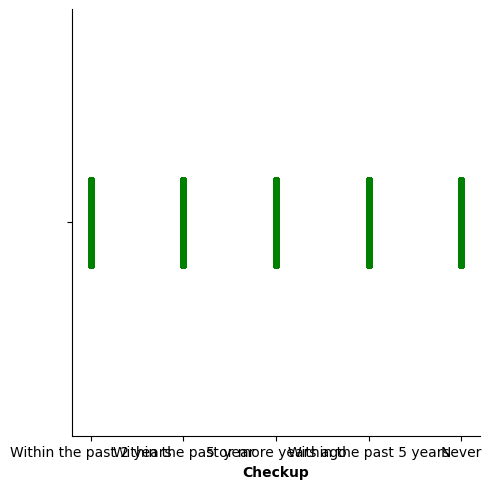

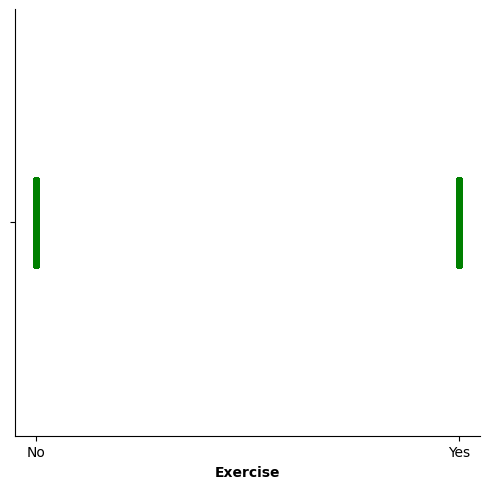

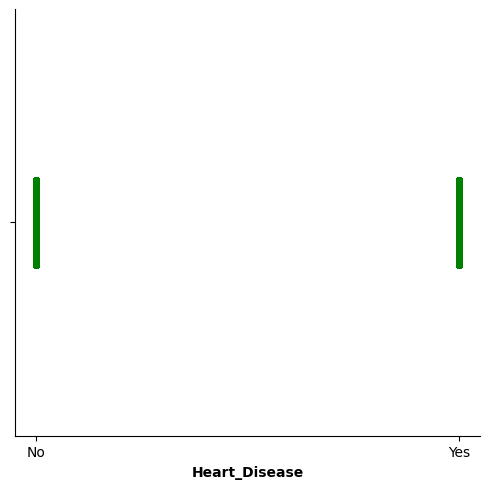

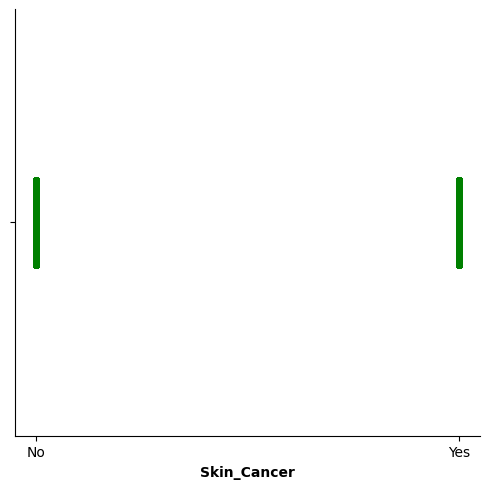

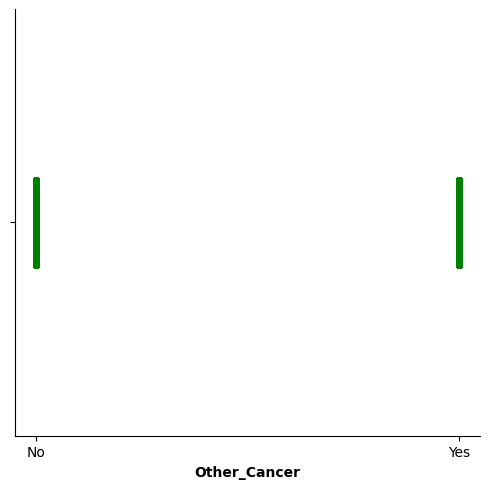

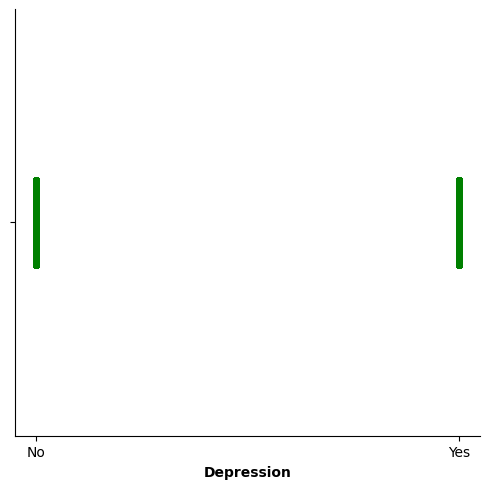

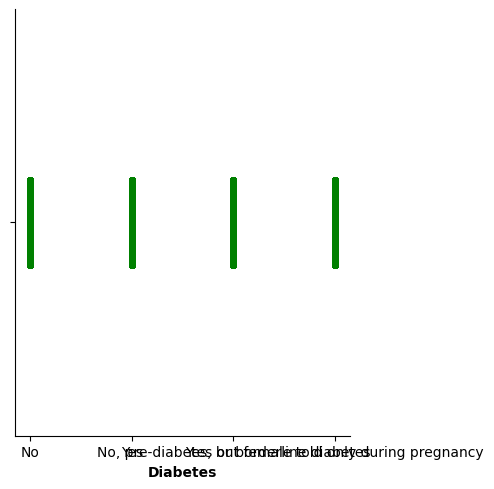

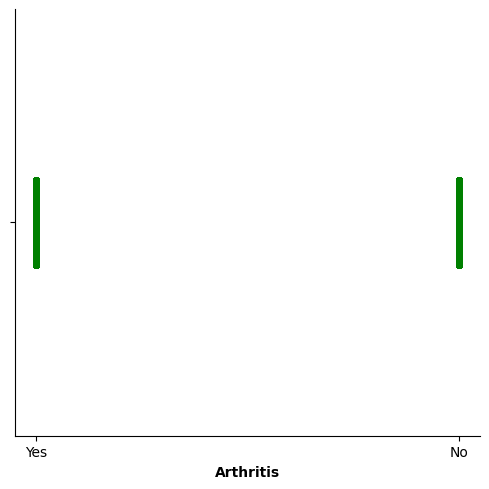

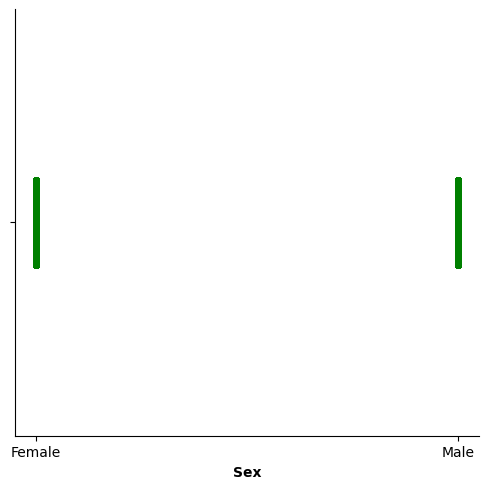

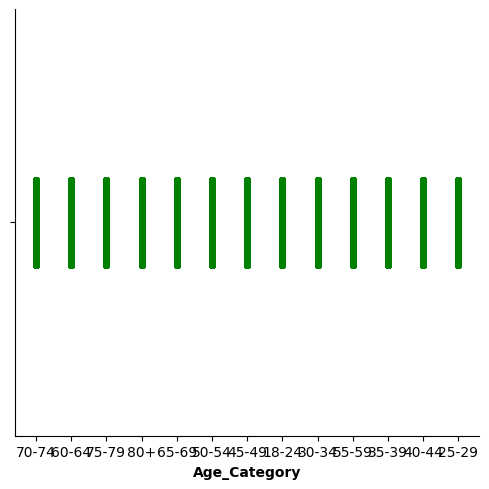

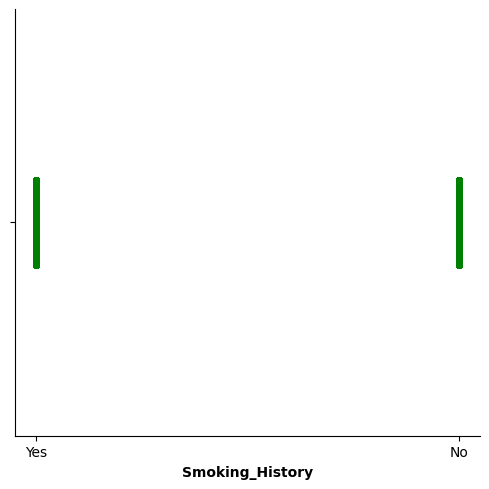

In [40]:
# Let's visualize for categorical features
plt.figure(figsize=(8,6))
for col in categorical_features:
    sns.catplot(data=df,x=col,color="green")
    plt.xlabel(col,weight="bold")
    print("\n")
    plt.show()

In [41]:
# Let's consider categorical features
categorical_features

['General_Health',
 'Checkup',
 'Exercise',
 'Heart_Disease',
 'Skin_Cancer',
 'Other_Cancer',
 'Depression',
 'Diabetes',
 'Arthritis',
 'Sex',
 'Age_Category',
 'Smoking_History']

In [42]:
# Let's see value counts for each features
df['General_Health'].value_counts()

General_Health
Very Good    110351
Good          95355
Excellent     55929
Fair          35808
Poor          11331
Name: count, dtype: int64

In [43]:
# Order for categries for General_Health [0,1,2,3,4]
General_Health_category = ['Poor','Fair','Good','Very Good','Excellent'] 

In [44]:
df['Checkup'].value_counts()

Checkup
Within the past year       239295
Within the past 2 years     37210
Within the past 5 years     17442
5 or more years ago         13420
Never                        1407
Name: count, dtype: int64

In [45]:
# Order for categories for Checkup
Checkup_category = ['Never','Within the past year','Within the past 2 years','Within the past 5 years','5 or more years ago']

In [46]:
# Order for categories for  Skin_Cancer
df['Skin_Cancer'].value_counts()

Skin_Cancer
No     278782
Yes     29992
Name: count, dtype: int64

In [47]:
Skin_Cancer_category = ['No','Yes']

In [48]:
# Order for categories for Other_Cancer
df['Other_Cancer'].value_counts()

Other_Cancer
No     278897
Yes     29877
Name: count, dtype: int64

In [49]:
Other_Cancer_category = ['No','Yes']

In [50]:
# Order for Depression 
df['Depression'].value_counts()

Depression
No     246875
Yes     61899
Name: count, dtype: int64

In [51]:
Depression_category = ['No','Yes']

In [3]:
df['Diabetes'].value_counts()

Diabetes
No                                            259141
Yes                                            40171
No, pre-diabetes or borderline diabetes         6896
Yes, but female told only during pregnancy      2646
Name: count, dtype: int64

In [ ]:
diabetes_category = ['No','No, pre-diabetes or borderline diabetes','Yes, but female told only during pregnancy','Yes']

In [52]:
# Order of categories for Artitritis 
df['Arthritis'].value_counts()

Arthritis
No     207711
Yes    101063
Name: count, dtype: int64

In [53]:
Arthritis_category = ['No','Yes']

In [54]:
# Order for Sex Categories
df['Sex'].value_counts()

Sex
Female    160155
Male      148619
Name: count, dtype: int64

In [55]:
Sex_category = ['Male','Female']

In [56]:
# Order for Age_Category
df['Age_Category'].value_counts()

Age_Category
65-69    33425
60-64    32409
70-74    31099
55-59    28048
50-54    25090
80+      22269
40-44    21587
45-49    20963
75-79    20699
35-39    20598
18-24    18670
30-34    18425
25-29    15492
Name: count, dtype: int64

In [62]:
Age_Category_category = ['18-24','25-29','30-34','35-39','40-44','45-49','50-54','55-59','60-64','65-69','70-74','75-79','80+']

In [63]:
# Order for Smoking_History categories
df['Smoking_History'].value_counts()

Smoking_History
No     183516
Yes    125258
Name: count, dtype: int64

In [64]:
Smoking_History_category = ['No','Yes']

In [65]:
# In Model Training we will map this categories.  

In [66]:
# Let's check for target feature
df['Heart_Disease'].value_counts()

Heart_Disease
No     283803
Yes     24971
Name: count, dtype: int64

## Target Feature (Heart_Disease) is NOT balanced. Therefore, we will be doing resampling of dataset after splitting the dataset into train data and test data.

In [67]:
df.head()

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,Poor,Within the past 2 years,No,No,No,No,No,No,Yes,Female,70-74,150,32.66,14.54,Yes,0,30,16,12
1,Very Good,Within the past year,No,Yes,No,No,No,Yes,No,Female,70-74,165,77.11,28.29,No,0,30,0,4
2,Very Good,Within the past year,Yes,No,No,No,No,Yes,No,Female,60-64,163,88.45,33.47,No,4,12,3,16
3,Poor,Within the past year,Yes,Yes,No,No,No,Yes,No,Male,75-79,180,93.44,28.73,No,0,30,30,8
4,Good,Within the past year,No,No,No,No,No,No,No,Male,80+,191,88.45,24.37,Yes,0,8,4,0


In [68]:
df.to_csv('CVD_preprocessed.csv',index=False)